In [1]:
import numpy as np
import pandas as pd
import string
import spacy
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import pandas

In [2]:
data = pd.read_csv("C:\\Users\\siddh\\Downloads\\Elon_musk.csv" ,encoding='latin-1')

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
import re

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # delete Mentions
    text = re.sub(r"#", "", text) # deleting Hashtags
    text = re.sub(r"RT[\s]+", "", text) # deleting Retweets
    text = re.sub(r"https?:\/\/\S+", "", text)# Deleting Hyper Links
    return text

data["Text"] = data["Text"].apply(cleantext)
data

,Text
0,Im an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [6]:
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data

,Text,subjectivity,polarity
0,Im an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


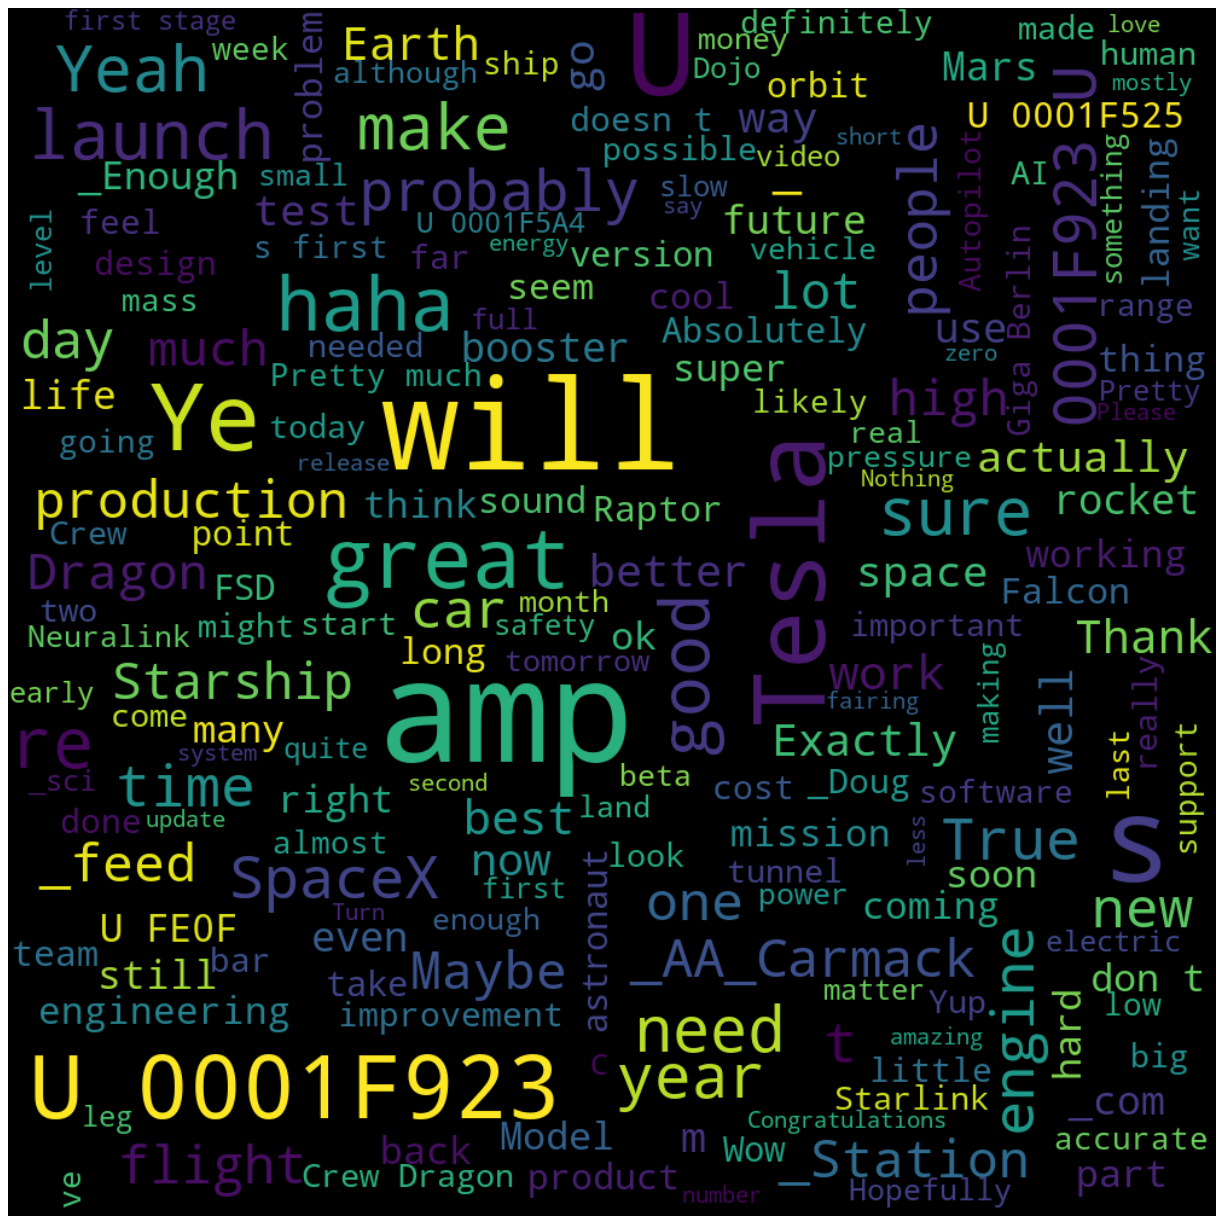

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [8]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)

data

,Text,subjectivity,polarity,analysis
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


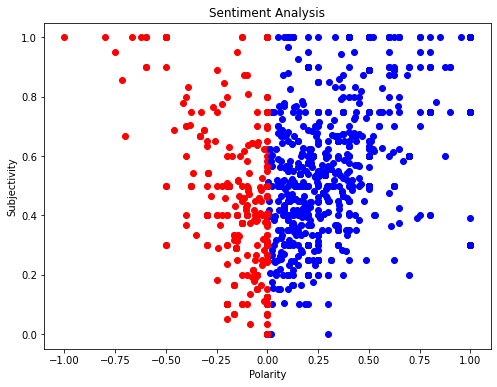

In [9]:
plt.figure(figsize=(8, 6))
for i in range(0, data.shape[0]):
    if(data["polarity"][i]>0):
        plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Blue")
    else:
        plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Red")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [10]:
#Polarity more than 0 are blue in color whereas less than zero is denoted in red color.
#From the above we conclude that more number of tweets are positive

In [11]:
#Extraction of reviews for a product from Amazon
#To perform Emotion Mining belwo

In [12]:
Reviews = pd.read_csv("C:\\Users\\siddh\\Downloads\\CanonPrinter.csv")
Reviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer
...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer


In [13]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            200 non-null    object
 1   profileName   200 non-null    object
 2   text          200 non-null    object
 3   date          200 non-null    object
 4   title         200 non-null    object
 5   rating        200 non-null    int64 
 6   images        5 non-null      object
 7   helpful       200 non-null    int64 
 8   Pattern name  200 non-null    object
dtypes: int64(2), object(7)
memory usage: 14.2+ KB


In [14]:
#We observed from the above that there are many null values in the images variable.

In [15]:
Reviews.isnull().sum()

id                0
profileName       0
text              0
date              0
title             0
rating            0
images          195
helpful           0
Pattern name      0
dtype: int64

In [16]:
Reviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer
...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer


In [17]:
#column We have dropped the image variable and above is the data after the removal

In [18]:
Reviews.isnull().sum()

id                0
profileName       0
text              0
date              0
title             0
rating            0
images          195
helpful           0
Pattern name      0
dtype: int64

In [19]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            200 non-null    object
 1   profileName   200 non-null    object
 2   text          200 non-null    object
 3   date          200 non-null    object
 4   title         200 non-null    object
 5   rating        200 non-null    int64 
 6   images        5 non-null      object
 7   helpful       200 non-null    int64 
 8   Pattern name  200 non-null    object
dtypes: int64(2), object(7)
memory usage: 14.2+ KB


In [20]:
Reviews.rating.value_counts()

5    81
4    58
1    41
3    14
2     6
Name: rating, dtype: int64

In [21]:
Reviews.rating.describe()

count    200.000000
mean       3.660000
std        1.528424
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

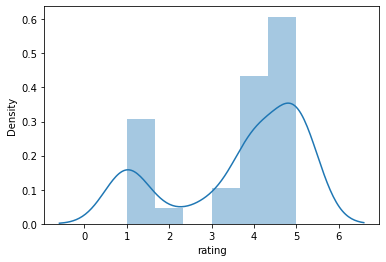

In [22]:
sns.distplot(Reviews['rating'])

<AxesSubplot:ylabel='rating'>

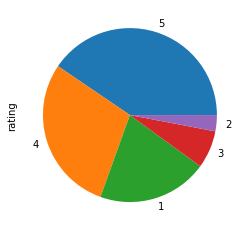

In [23]:
Reviews.rating.value_counts().plot(kind ='pie')

In [24]:
#From the above data we conclude that most of the people has rated from 3 star to 5 star.

In [25]:
#USING TEXTBLOB TO GENERATE SUBJECTIVITY AND POLARITY FOR TEXT
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
Reviews[["subjectivity", "polarity"]] = Reviews.apply(sentiment_analysis, axis=1)
Reviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name,subjectivity,polarity
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer,0.587500,0.004167
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer,0.617778,0.357407
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer,0.277143,0.037143
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer,0.700000,-0.075000
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer,0.590741,0.062963
...,...,...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer,0.529630,0.057407
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer,0.643030,0.283333
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer,0.484375,0.173958
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer,0.505903,0.269792


In [26]:
#Using TextBlob to genereate subjectivity and polarity on title
from textblob import TextBlob 
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["title"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
Reviews[["subjectivity_title", "polarity_title"]] = Reviews.apply(sentiment_analysis, axis=1)
Reviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name,subjectivity,polarity,subjectivity_title,polarity_title
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer,0.587500,0.004167,0.9,-0.5
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer,0.617778,0.357407,0.0,0.0
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer,0.277143,0.037143,0.0,0.0
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer,0.700000,-0.075000,0.0,0.0
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer,0.590741,0.062963,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer,0.529630,0.057407,0.9,-0.8
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer,0.643030,0.283333,0.6,0.7
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer,0.484375,0.173958,0.3,1.0
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer,0.505903,0.269792,1.0,1.0


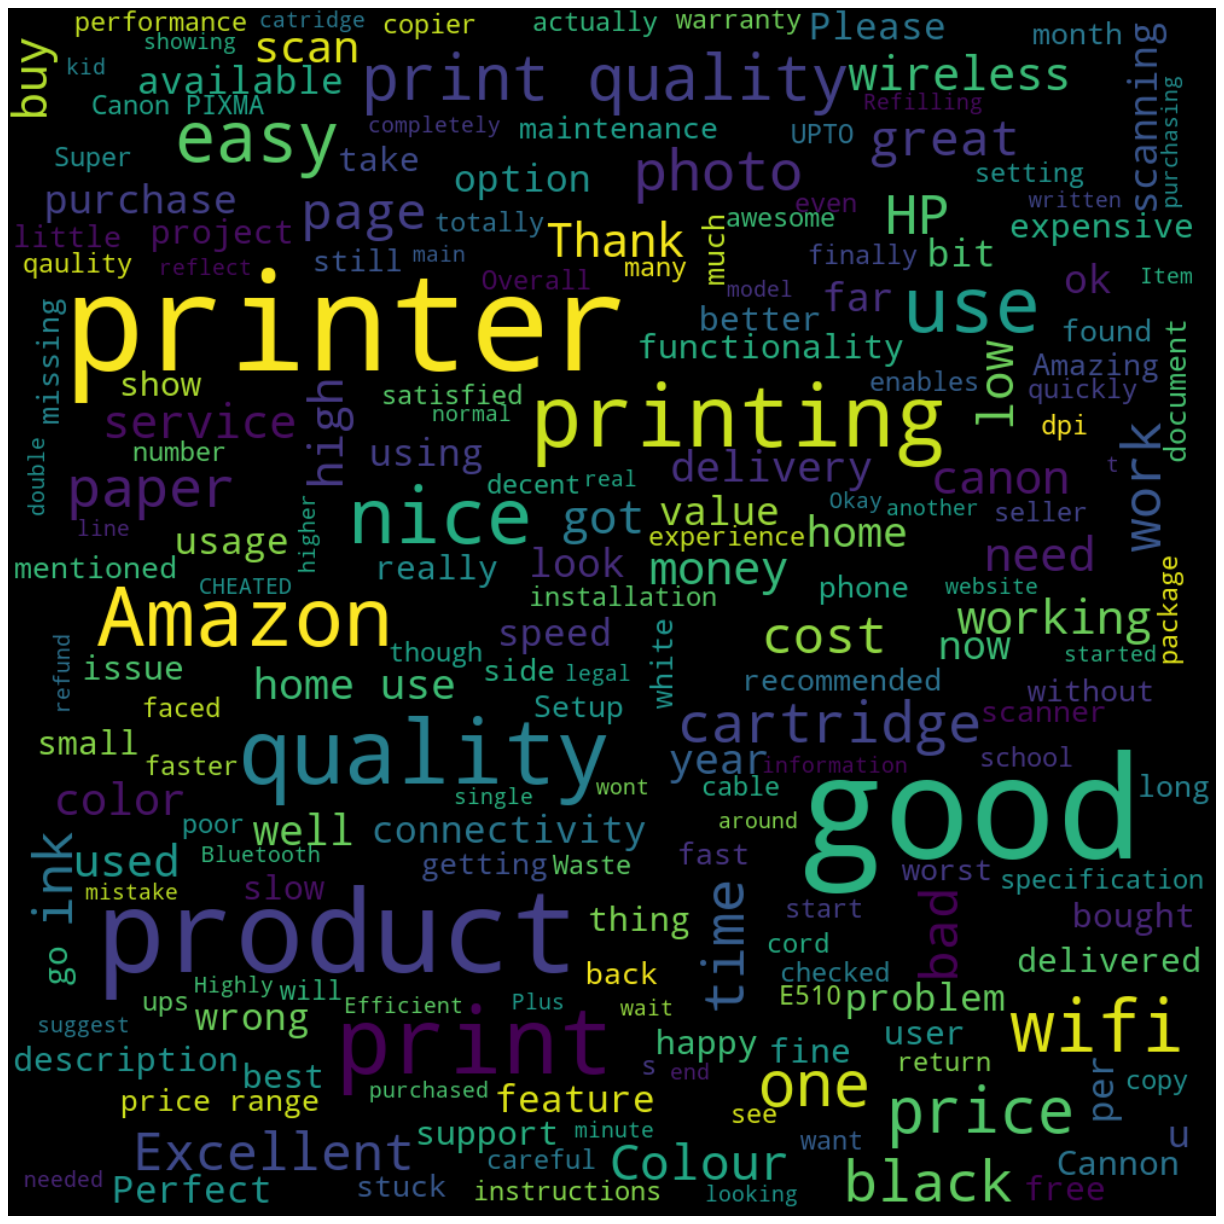

In [27]:
#Word cloud plotting on text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([rev for rev in Reviews["text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
#IN THE ABOVE WE CAN SEE THAT MOST OF THE WORDS ARE RELEVANT TO THE PRODUCT PRINTER

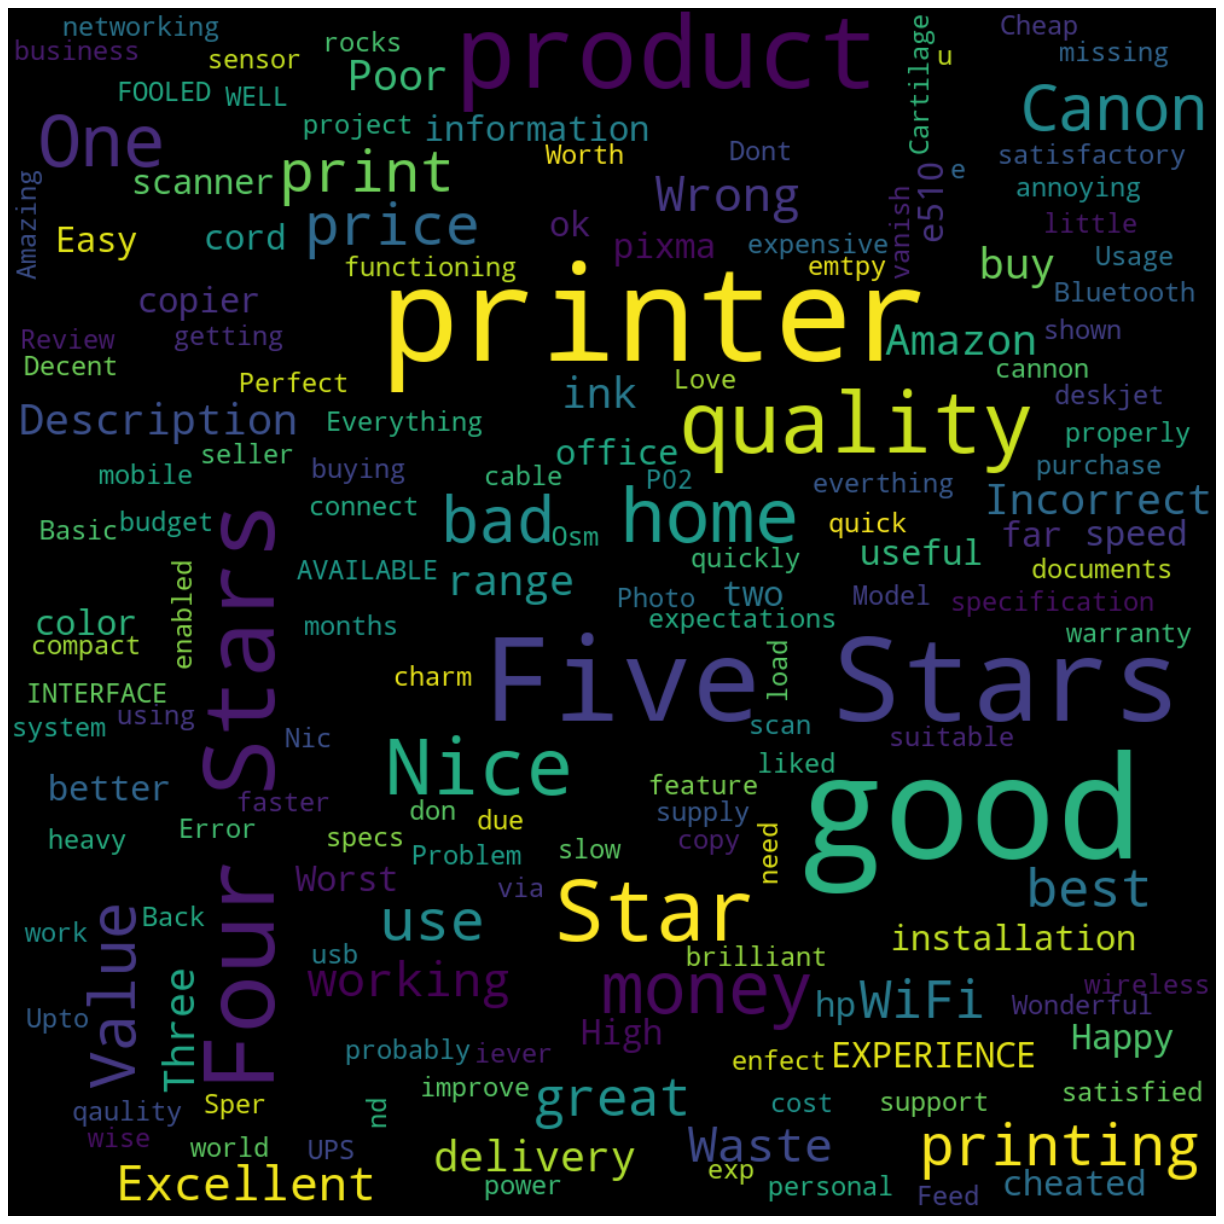

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([rev for rev in Reviews["title"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [30]:
#The above data shows whether the products are good, bad, nice, suitable. It seems like most of the customer are satisfied for the above product.

In [31]:
#EMOTION MINING
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
Reviews["analysis"] = Reviews["polarity"].apply(analysis)
Reviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name,subjectivity,polarity,subjectivity_title,polarity_title,analysis
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer,0.587500,0.004167,0.9,-0.5,Positive
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer,0.617778,0.357407,0.0,0.0,Positive
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer,0.277143,0.037143,0.0,0.0,Positive
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer,0.700000,-0.075000,0.0,0.0,Negative
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer,0.590741,0.062963,1.0,-1.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer,0.529630,0.057407,0.9,-0.8,Positive
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer,0.643030,0.283333,0.6,0.7,Positive
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer,0.484375,0.173958,0.3,1.0,Positive
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer,0.505903,0.269792,1.0,1.0,Positive


In [32]:
#EMOTION MINING FOR text
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
Reviews["analysis_title"] = Reviews["polarity_title"].apply(analysis)
Reviews

,id,profileName,text,date,title,rating,images,helpful,Pattern name,subjectivity,polarity,subjectivity_title,polarity_title,analysis,analysis_title
0,R2LJJZHB0XN8IW,joel prasad,\n It shows that wireless/wifi connectivity i...,Reviewed in India on 14 December 2018,Wrong information shown in Amazon,1,NaN,36,Printer,0.587500,0.004167,0.9,-0.5,Positive,Negative
1,R4P7M695N0EHL,Sumeet Gilra,\n I am using this printer around 3 years and...,Reviewed in India on 7 October 2018,Value for Money,5,NaN,18,Printer,0.617778,0.357407,0.0,0.0,Positive,Neutral
2,RVD6LMJR268N,Amazon Customer,\n I bought this printer 3 years back. I use ...,Reviewed in India on 3 September 2018,Value for Money,5,NaN,17,Printer,0.277143,0.037143,0.0,0.0,Positive,Neutral
3,RWA22UKF7LX6Z,soko,\n The product discriptiinnwrongly states tha...,Reviewed in India on 3 December 2019,Incorrect Description by seller,1,NaN,1,Printer,0.700000,-0.075000,0.0,0.0,Negative,Neutral
4,R3PGZUTAC5JJE2,Vasanth,\n I bought this printer for 4899 and i'm ref...,Reviewed in India on 7 June 2020,Worst Printer,1,NaN,1,Printer,0.590741,0.062963,1.0,-1.0,Positive,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,R1V4DOQPGGVSNC,Shubham Roy,\n I had a HP deskjet 1560 before which was a...,Reviewed in India on 28 March 2015,I had a HP deskjet 1560 before which was annoy...,4,NaN,1,Printer,0.529630,0.057407,0.9,-0.8,Positive,Negative
196,R2NCJPBCJPGJUC,Manpreet Singh,\n A very nice printer. Very easy to setup an...,Reviewed in India on 11 March 2015,A good quality compact printer,5,NaN,1,Printer,0.643030,0.283333,0.6,0.7,Positive,Positive
197,R1JL6N9Q3AJ47W,Bijoy Chakraborty,\n Thanks Amazon for fast delivery and giving...,Reviewed in India on 6 December 2014,Best budget home Printer,5,NaN,1,Printer,0.484375,0.173958,0.3,1.0,Positive,Positive
198,R102ON33ZZLGYI,Gautham Kiran,\n Canon Pixma E 510 qualifies all the requir...,Reviewed in India on 23 December 2014,Wonderful product for Home Usage,5,NaN,1,Printer,0.505903,0.269792,1.0,1.0,Positive,Positive


In [33]:
#TF-IDF VECTORIZER

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(Reviews)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['analysis', 'analysis_title', 'date', 'helpful', 'id', 'images', 'name', 'pattern', 'pattern name', 'polarity', 'polarity_title', 'profilename', 'rating', 'subjectivity', 'subjectivity_title', 'text', 'title']
[[0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.  

In [34]:
Reviews["analysis"].value_counts()

Positive    144
Negative     36
Neutral      20
Name: analysis, dtype: int64

In [35]:
Reviews["analysis_title"].value_counts()

Neutral     93
Positive    79
Negative    28
Name: analysis_title, dtype: int64

In [36]:
#from the above we conclude that 46.5% customers are neutral, 39.5% are positive and 14% of the customers have negative reviews.